In [1]:
import os
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

In [2]:
result_dir = Path(os.getcwd())

proj_dir = result_dir.parent

os.chdir(proj_dir)


In [3]:
from utils.results import SimulationResults

RUNID = "run0"

test0_results = SimulationResults(runids=[RUNID])

print(test0_results.var_list)
print(test0_results.timestep_output_ids)

['2m_temperature' 'abs_xgr' 'abs_zgr' 'angles' 'computational_time'
 'convective_heat_flux' 'cumulative_computational_time'
 'ground_enthalpy_distribution' 'ground_temperature_distribution'
 'latent_heat_flux' 'long_wave_radiation_flux' 'mean_wave_angle'
 'orbital_velocity' 'radiation_stress_xx' 'radiation_stress_xy'
 'radiation_stress_yy' 'run_up' 'sea_ice_cover' 'sea_surface_temperature'
 'solar_radiation_factor' 'solar_radiation_flux' 'storm_surge'
 'thaw_depth' 'total_heat_flux' 'velocity_magnitude' 'wave_energy'
 'wave_height' 'wind_direction' 'wind_velocity' 'xgr' 'zgr']
[  0  24  48  72  96 120 144 168 192]


In [4]:
test0_results.get_var_timeseries("computational_time")[RUNID]

[array(7.82763195),
 array(60.75216389),
 array(103.26374149),
 array(145.50098157),
 array(187.89175725),
 array(338.07395315),
 array(486.38640904),
 array(624.99212384),
 array(758.46674871)]

In [5]:
# xgr0 = test0_results.get_var_timestep("xgr", 0)[RUNID]
# zgr0 = test0_results.get_var_timestep("zgr", 0)[RUNID]

# xgr1416 = test0_results.get_var_timestep("xgr", 1416)[RUNID]
# zgr1416 = test0_results.get_var_timestep("zgr", 1416)[RUNID]

# plt.plot(xgr0, zgr0, label='t=0')
# plt.plot(xgr1416, zgr1416, label='t=1416')

[-10.          -9.86962173  -9.72932119  -9.58980432  -9.45106038
  -9.31311003  -9.17597407  -9.03964589  -8.90413169  -8.76942205
  -8.63553624  -8.50249441  -8.37029042  -8.23893037  -8.10840455
  -7.97873221  -7.84993427  -7.72200379  -7.59493191  -7.46873692
  -7.34343923  -7.21901958  -7.09549419  -6.97288158  -6.85117664
  -6.73037161  -6.61049537  -6.49154361  -6.37350909  -6.25641973
  -6.14026068  -6.02504612  -5.9107933   -5.79748661  -5.68515102
  -5.57377332  -5.46448365  -5.35733691  -5.25229109  -5.14930499
  -5.04833822  -5.          -5.          -5.          -5.
  -5.          -5.          -5.          -5.          -5.
  -5.          -5.          -5.          -5.          -5.
  -5.          -5.          -5.          -5.          -5.
  -5.          -5.          -5.          -5.          -5.
  -5.          -5.          -5.          -5.          -5.
  -5.          -5.          -5.          -5.          -5.
  -5.          -5.          -5.          -5.          -5.
  -5.   

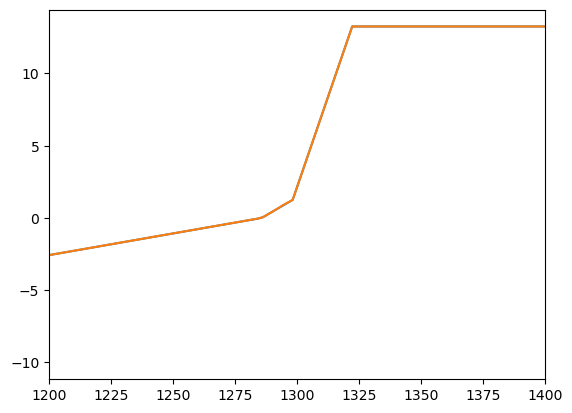

In [8]:
xgr0 = test0_results.get_var_timestep("xgr", 0)[RUNID]
zgr0 = test0_results.get_var_timestep("zgr", 0)[RUNID]

xgr96 = test0_results.get_var_timestep("xgr", 192)[RUNID]
zgr96 = test0_results.get_var_timestep("zgr", 192)[RUNID]

plt.plot(xgr0, zgr0, label='t=0')
plt.plot(xgr96, zgr96, label='t=1416')

plt.xlim((1200, 1400))

print(zgr0)
print(zgr96)

So the bathymetry is not updating. What about temperature distribution?

In [23]:
abs_xgr0 = test0_results.get_var_timestep("abs_xgr", 0)[RUNID]
abs_zgr0 = test0_results.get_var_timestep("abs_zgr", 0)[RUNID]
ground_temperature_distribution0 = test0_results.get_var_timestep(
    "ground_temperature_distribution", 0)[RUNID]

C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_12284\2235081491.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


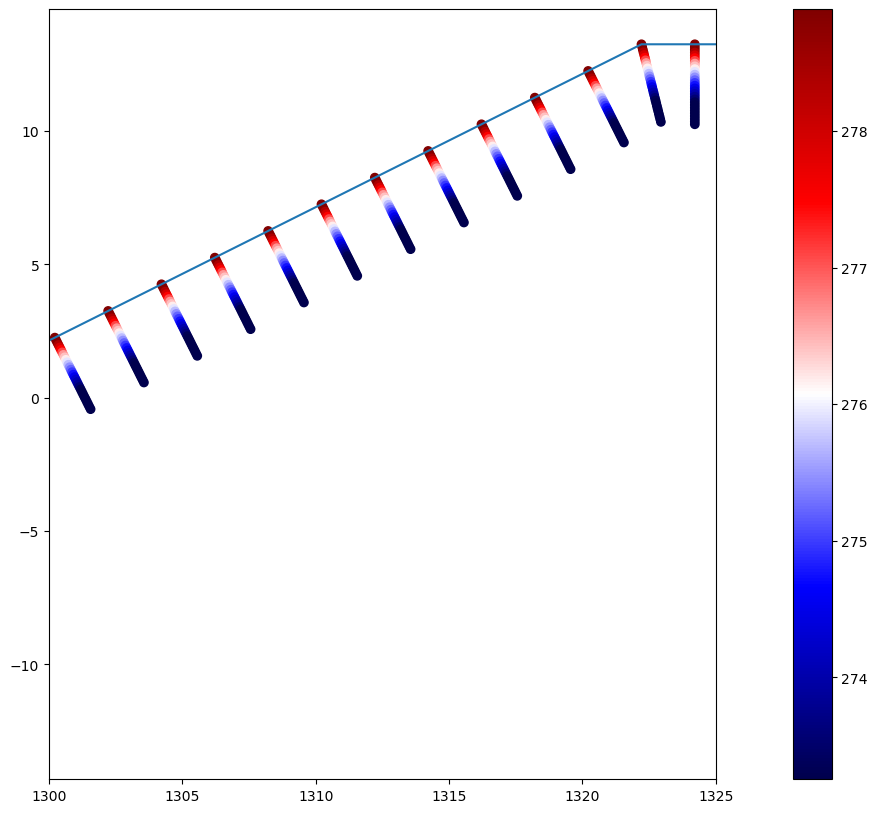

In [25]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(xgr0, zgr0, label='bathymetry')

scatter = ax.scatter(abs_xgr0, abs_zgr0, 
                     c=ground_temperature_distribution0, cmap='seismic')

sm = ScalarMappable(cmap='seismic')

sm.set_array(ground_temperature_distribution0)

plt.colorbar(sm, ax=ax)

ax.set_aspect("equal")

ax.set_xlim(1300, 1325)

fig.show()

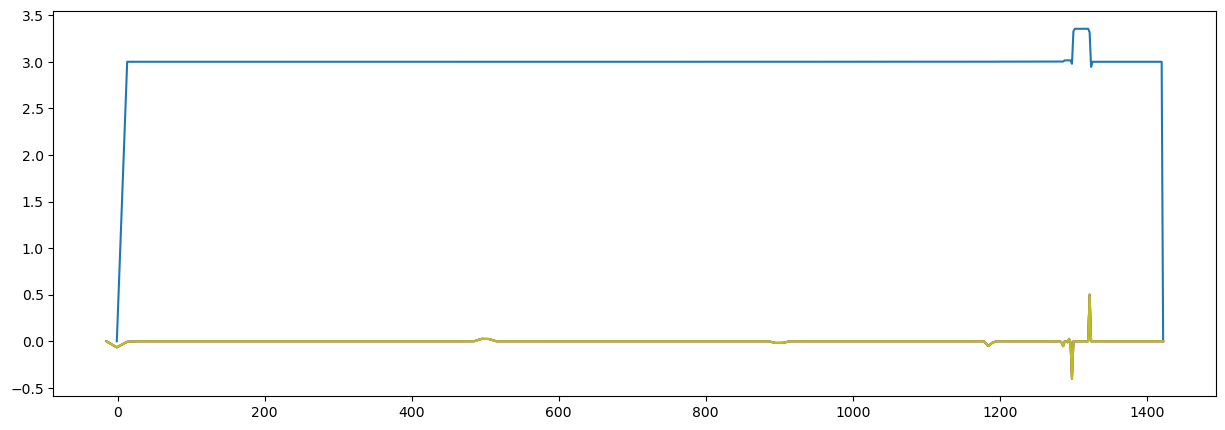

In [20]:
fig, ax = plt.subplots(figsize=(15,5))

for t in test0_results.timestep_output_ids:
    
    xgr = test0_results.get_var_timestep('xgr', t)[RUNID]
    thaw_depth = test0_results.get_var_timestep('thaw_depth', t)[RUNID]
    
    if not xgr.shape == thaw_depth.shape:
        ax.plot(xgr[min([len(xgr), len(thaw_depth)])-1], thaw_depth[min([len(xgr), len(thaw_depth)])-1])
    else:
        ax.plot(xgr, thaw_depth)